In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel("data_train.xlsx")
df.dtypes

Restaurant       object
Location         object
Cuisines         object
Average_Cost     object
Minimum_Order    object
Rating           object
Votes            object
Reviews          object
Delivery_Time    object
dtype: object

In [3]:
for i in range(len(df)-1, -1, -1):
    if df.iloc[i, 5] == "NEW":
        df.drop(index = [i], inplace = True)
df.head(10)
df.index = [i for i in range(len(df))]
df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10326, 10327, 10328, 10329, 10330, 10331, 10332, 10333, 10334,
            10335],
           dtype='int64', length=10336)

In [4]:
avg_cost = set(df["Average_Cost"])
avg_cost = list(df["Average_Cost"])
for i in range(len(df)):
    if len(avg_cost[i]) == 6:
        avg_cost[i] = int(avg_cost[i][1]+avg_cost[i][3:])
    else:
        avg_cost[i] = int(avg_cost[i][1:])
df["Average_Cost"] = avg_cost
df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,₹99,3.2,521,235,65 minutes


In [5]:
min_cost = set(df["Minimum_Order"])
min_cost = list(df["Minimum_Order"])

for i in range(len(df)):
    min_cost[i] = int(min_cost[i][1:])
    
df["Minimum_Order"] = min_cost
df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521,235,65 minutes


In [6]:
x = list(df["Votes"])
y = list(df["Reviews"])
for i in range(0, len(x)):
    try:
        x[i] = int(x[i])
    except:
        x[i] = 0
    
for i in range(0, len(y)):
    try:
        y[i] = int(y[i])
    except:
        y[i] = 0
        
ex_x = x.count(0)
ex_y = y.count(0)
mean_x = int(sum(x)/(len(x)-ex_x))
mean_y = int(sum(y)/(len(y)-ex_y))
mean_x, mean_y

for j in range(len(x)):
    if x[j] == 0:
        x[j] = mean_x

for j in range(len(y)):
    if y[j] == 0:
        y[j] = mean_y
        
ex_x = x.count(0)
ex_y = y.count(0)
ex_x, ex_y

df["Votes"] = x
df["Reviews"] = y
df.head(10)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521,235,65 minutes
5,ID_5221,"Rmz Centennial, I Gate, Whitefield","South Indian, North Indian, Chinese",150,50,3.8,46,18,30 minutes
6,ID_3777,Mumbai Central,"Beverages, Fast Food",150,50,3.7,108,31,30 minutes
7,ID_745,Delhi University-GTB Nagar,"Chinese, Thai, Asian",650,50,4.0,1731,1235,45 minutes
8,ID_2970,Delhi University-GTB Nagar,"Mithai, Street Food",100,50,3.9,110,26,30 minutes
9,ID_3474,"Sector 1, Noida","Fast Food, North Indian, Rolls, Chinese, Momos...",200,50,3.9,562,294,65 minutes


In [7]:
time = list(df["Delivery_Time"])
for i in range(len(df)):
    time[i] = int(time[i][:2])
    
df["Delivery_Time"] = time 
df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11,4,30
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176,95,30
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521,235,65


In [8]:
loc = list(set(df["Location"]))

map_loc = {}

for i in range(len(loc)):
    map_loc[loc[i]] = i+1
    
map_loc
loc = list(df["Location"])

for i in range(0, len(df)):
    loc[i] = map_loc[loc[i]]
    
df["Location"] = loc
df.head(10)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,28,"Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30
1,ID_2882,17,"Ice Cream, Desserts",100,50,3.5,11,4,30
2,ID_1595,31,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65
3,ID_5929,18,"Mughlai, North Indian, Chinese",250,99,3.7,176,95,30
4,ID_6123,9,"Cafe, Beverages",200,99,3.2,521,235,65
5,ID_5221,9,"South Indian, North Indian, Chinese",150,50,3.8,46,18,30
6,ID_3777,31,"Beverages, Fast Food",150,50,3.7,108,31,30
7,ID_745,3,"Chinese, Thai, Asian",650,50,4.0,1731,1235,45
8,ID_2970,3,"Mithai, Street Food",100,50,3.9,110,26,30
9,ID_3474,18,"Fast Food, North Indian, Rolls, Chinese, Momos...",200,50,3.9,562,294,65


In [9]:
food = list(df["Cuisines"])
s = []
for i in range(len(food)):
    x = list(food[i].split(", "))
    for j in range(len(x)):
        s.append(x[j])
        
s = set(s)
len(s)
s

{'Afghan',
 'African',
 'American',
 'Andhra',
 'Arabian',
 'Asian',
 'Assamese',
 'Awadhi',
 'BBQ',
 'Bakery',
 'Bangladeshi',
 'Bar Food',
 'Belgian',
 'Bengali',
 'Beverages',
 'Bihari',
 'Biryani',
 'Bohri',
 'Brazilian',
 'Bubble Tea',
 'Burger',
 'Burmese',
 'Cafe',
 'Cantonese',
 'Charcoal Chicken',
 'Chettinad',
 'Chinese',
 'Coffee',
 'Continental',
 'Desserts',
 'European',
 'Fast Food',
 'Finger Food',
 'French',
 'Frozen Yogurt',
 'German',
 'Goan',
 'Greek',
 'Gujarati',
 'Healthy Food',
 'Hot dogs',
 'Hyderabadi',
 'Ice Cream',
 'Indian',
 'Indonesian',
 'Iranian',
 'Israeli',
 'Italian',
 'Japanese',
 'Juices',
 'Kashmiri',
 'Kebab',
 'Kerala',
 'Konkan',
 'Korean',
 'Lebanese',
 'Lucknowi',
 'Maharashtrian',
 'Malaysian',
 'Malwani',
 'Mangalorean',
 'Mediterranean',
 'Mexican',
 'Middle Eastern',
 'Mishti',
 'Mithai',
 'Modern Indian',
 'Momos',
 'Mughlai',
 'Naga',
 'Nepalese',
 'North Eastern',
 'North Indian',
 'Odia',
 'Paan',
 'Parsi',
 'Pizza',
 'Poké',
 'Portugu

In [10]:
food = list(df["Cuisines"])

for i in range(len(food)):
    x = list(food[i].split(", "))
    food[i] = len(x)
    
df["Cuisines"] = food

In [11]:
d = list(set(df["Rating"]))
d.sort()
d[-1]
for i in range(len(df)-1,0,-1):
    if df.iloc[i, 5] == d[-1] or df.iloc[i, 5] == d[-2] or df.iloc[i, 5] == d[0]:
        df.drop(i, inplace = True)
        
d = list(set(df["Rating"]))
d.sort()
# d[-1]

d = list(df["Rating"])
d = list(map(float, d))
df["Rating"] = d
df.dropna(inplace = True)
df.index = [i for i in range(len(df))]
#cd[0]
df.head(10)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,28,5,200,50,3.5,12,4,30
1,ID_2882,17,2,100,50,3.5,11,4,30
2,ID_1595,31,3,150,50,3.6,99,30,65
3,ID_5929,18,3,250,99,3.7,176,95,30
4,ID_6123,9,2,200,99,3.2,521,235,65
5,ID_5221,9,3,150,50,3.8,46,18,30
6,ID_3777,31,2,150,50,3.7,108,31,30
7,ID_745,3,3,650,50,4.0,1731,1235,45
8,ID_2970,3,2,100,50,3.9,110,26,30
9,ID_3474,18,6,200,50,3.9,562,294,65


In [12]:
def test(name):
    x = list(df[name])
    for i in range(len(x)):
        x[i] = float(x[i])
    df[name] = x
    print("Checked!")
            
test("Average_Cost")
test("Minimum_Order")
test("Rating")
test("Votes")
test("Delivery_Time")


Checked!
Checked!
Checked!
Checked!
Checked!


[]

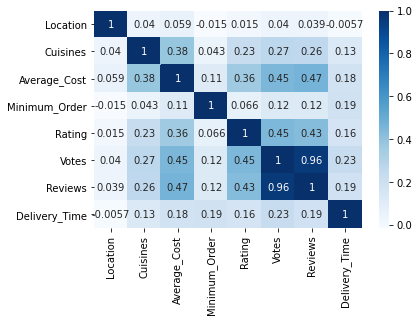

In [13]:
'''
sns.heatmap(df.corr(), annot = True, cmap ="Blues")
plt.plot()
'''
sns.heatmap(df.corr(), annot = True, cmap ="Blues")
plt.plot()

[]

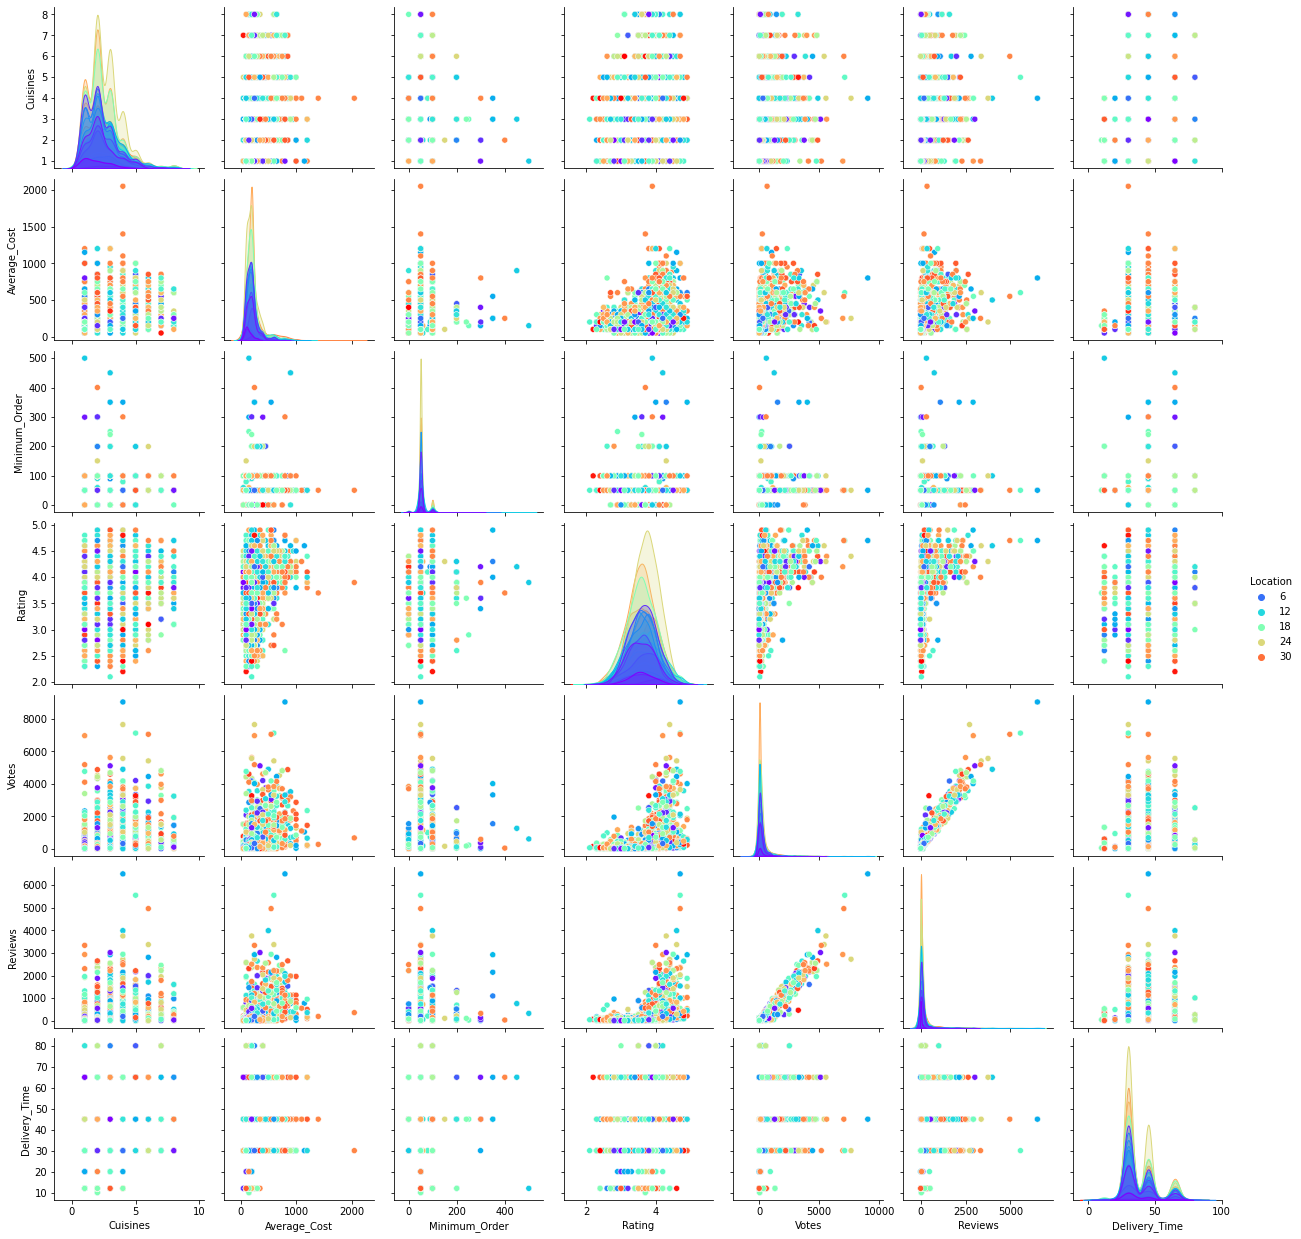

In [14]:
'''
sns.pairplot(df, hue = 'Location')
plt.plot()
'''
sns.pairplot(df, hue = 'Location', palette = 'rainbow')
plt.plot()

[]

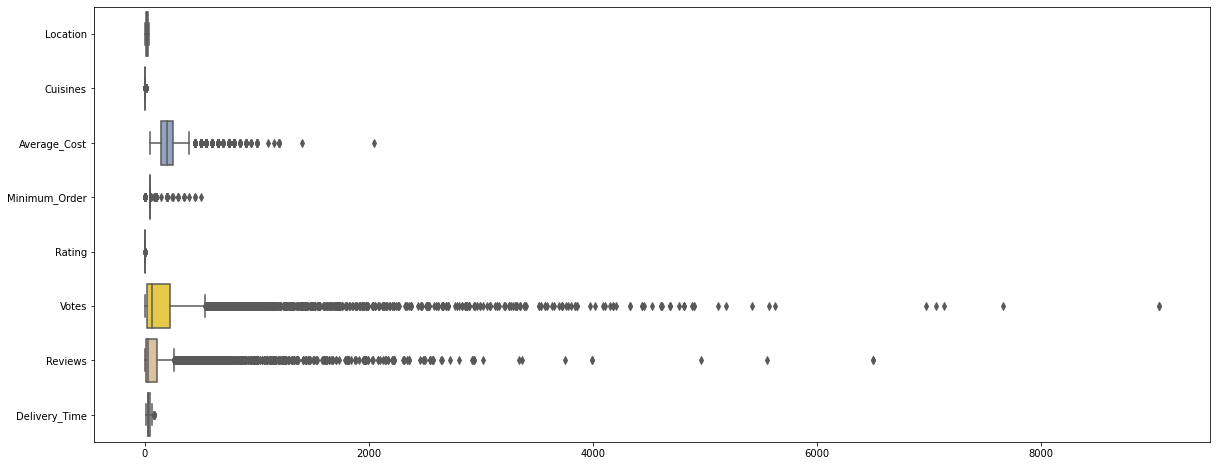

In [15]:
'''
fig = plt.figure(figsize = (20, 8))
sns.boxplot(data = df, orient = "h", palette = "Set2")
plt.plot()
'''
fig = plt.figure(figsize = (20, 8))
sns.boxplot(data = df, orient = "h", palette = "Set2")
plt.plot()

In [16]:
df.drop(columns=["Reviews", "Location"], inplace = True)
df.dtypes

Restaurant        object
Cuisines           int64
Average_Cost     float64
Minimum_Order    float64
Rating           float64
Votes            float64
Delivery_Time    float64
dtype: object

In [17]:
X = df.iloc[:, 1:6].values
#X = X.reshape(-1,1)
Y = df.iloc[:, -1].values
df.head()

,Restaurant,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Delivery_Time
0,ID_6321,5,200.0,50.0,3.5,12.0,30.0
1,ID_2882,2,100.0,50.0,3.5,11.0,30.0
2,ID_1595,3,150.0,50.0,3.6,99.0,65.0
3,ID_5929,3,250.0,99.0,3.7,176.0,30.0
4,ID_6123,2,200.0,99.0,3.2,521.0,65.0


In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)


In [19]:
from sklearn.linear_model import LinearRegression

In [21]:
reg = LinearRegression()
reg.fit(x_train, y_train)

pred = x_test

result = reg.predict(pred)

res = pd.DataFrame((y_test, result), index = ['Expected', 'Predicted']).T
res

,Expected,Predicted
0,30.0,37.423973
1,65.0,42.372994
2,45.0,45.177145
3,30.0,35.308335
4,65.0,39.783344
...,...,...
3009,30.0,34.944508
3010,30.0,46.756573
3011,30.0,35.925613
3012,45.0,36.676721


In [22]:
from sklearn import metrics
r2_score = metrics.r2_score(y_test, result)
r2_score

0.09704058859298392

In [23]:
mae = metrics.mean_absolute_error(y_test, result)
mae

8.830577168817747

In [24]:
from sklearn import ensemble

clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
                                         learning_rate = 0.25, loss = 'ls')
clf.fit(x_train, y_train)
clf.score(x_test, y_test)


0.1853667975836345

In [25]:
df = pd.read_excel("data_train.xlsx")
df.dtypes

for i in range(len(df)-1, -1, -1):
    if df.iloc[i, 5] == "NEW":
        df.drop(index = [i], inplace = True)
df.head(10)
df.index = [i for i in range(10336)]
df.index

avg_cost = set(df["Average_Cost"])
avg_cost = list(df["Average_Cost"])
for i in range(len(df)):
    if len(avg_cost[i]) == 6:
        avg_cost[i] = int(avg_cost[i][1]+avg_cost[i][3:])
    else:
        avg_cost[i] = int(avg_cost[i][1:])
df["Average_Cost"] = avg_cost
df.head()

min_cost = set(df["Minimum_Order"])
min_cost = list(df["Minimum_Order"])

for i in range(len(df)):
    min_cost[i] = int(min_cost[i][1:])
    
df["Minimum_Order"] = min_cost
df.head()
x = list(df["Votes"])
y = list(df["Reviews"])
for i in range(0, len(x)):
    try:
        x[i] = int(x[i])
    except:
        x[i] = 0
    
for i in range(0, len(y)):
    try:
        y[i] = int(y[i])
    except:
        y[i] = 0
        
ex_x = x.count(0)
ex_y = y.count(0)
mean_x = int(sum(x)/(len(x)-ex_x))
mean_y = int(sum(y)/(len(y)-ex_y))
mean_x, mean_y

for j in range(len(x)):
    if x[j] == 0:
        x[j] = mean_x

for j in range(len(y)):
    if y[j] == 0:
        y[j] = mean_y
        
ex_x = x.count(0)
ex_y = y.count(0)
ex_x, ex_y

df["Votes"] = x
df["Reviews"] = y
df.head(10)

food = list(df["Cuisines"])

for i in range(len(food)):
    x = list(food[i].split(", "))
    food[i] = len(x)
    
df["Cuisines"] = food

d = list(set(df["Rating"]))
d.sort()
d[-1]
for i in range(len(df)-1,0,-1):
    if df.iloc[i, 5] == d[-1] or df.iloc[i, 5] == d[-2] or df.iloc[i, 5] == d[0]:
        df.drop(i, inplace = True)
        
d = list(set(df["Rating"]))
d.sort()
# d[-1]

d = list(df["Rating"])
d = list(map(float, d))
df["Rating"] = d
df.dropna(inplace = True)
df.index = [i for i in range(len(df))]
#cd[0]
df.head(10)

for i in range(len(df)-1, 0, -1):
    if (df.iloc[i, 7] > 300 and df.iloc[i, 6] > 300):
        df.drop(i,inplace = True)
df.index = [i for i in range(len(df))]

time = list(df["Delivery_Time"])
for i in range(len(df)):
    time[i] = int(time[i][:2])
    
df["Delivery_Time"] = time 
df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune",5,200,50,3.5,12,4,30
1,ID_2882,"Sector 3, Marathalli",2,100,50,3.5,11,4,30
2,ID_1595,Mumbai Central,3,150,50,3.6,99,30,65
3,ID_5929,"Sector 1, Noida",3,250,99,3.7,176,95,30
4,ID_6123,"Rmz Centennial, I Gate, Whitefield",2,200,99,3.2,521,235,65


In [26]:
df.drop(columns=["Reviews", "Location"], inplace = True)
df.dtypes

Restaurant        object
Cuisines           int64
Average_Cost       int64
Minimum_Order      int64
Rating           float64
Votes              int64
Delivery_Time      int64
dtype: object

In [27]:
X = df.iloc[:, 1:6].values
#X = X.reshape(-1,1)
Y = df.iloc[:, -1].values
df.head()

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 63)
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

pred = x_test

result = reg.predict(pred)

res = pd.DataFrame((y_test, result), index = ['Expected', 'Predicted']).T
res

,Expected,Predicted
0,30.0,35.909395
1,30.0,34.223210
2,30.0,36.352856
3,30.0,34.632931
4,30.0,35.281436
...,...,...
2731,45.0,35.358842
2732,30.0,35.310237
2733,30.0,34.024879
2734,45.0,33.497402


In [28]:
from sklearn import metrics
r2_score = metrics.r2_score(y_test, result)
print(r2_score)

mae = metrics.mean_absolute_error(y_test, result)
print(mae)

0.12290167611657854
8.067114094470332


In [29]:
from sklearn import ensemble

clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
                                         learning_rate = 0.25, loss = 'ls')
clf.fit(x_train, y_train)
clf.score(x_test, y_test)
mae = metrics.mean_absolute_error(y_test, result)
print(mae)

8.067114094470332


In [42]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)


pred = dtree.predict(x_test)


comp = pd.DataFrame({'Original':y_test, 'Predicted':pred})
comp['Diff'] = comp['Original'] - comp['Predicted']

acc = dtree.score(x_test, y_test)
print('\nThe accuracy of the classifier is:', acc)
#comp.head()

mae = metrics.mean_absolute_error(y_test, pred)
print(mae)

comp.head(20)


The accuracy of the classifier is: 0.6827485380116959
6.375365497076023


,Original,Predicted,Diff
0,30,30,0
1,30,30,0
2,30,65,-35
3,30,30,0
4,30,30,0
5,30,30,0
6,30,30,0
7,30,45,-15
8,65,30,35
9,30,30,0


In [47]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=400)
classifier.fit(x_train, y_train)

pred = classifier.predict(x_test)
#print(pred)

comp = pd.DataFrame({'Original':y_test, 'Predicted':pred})
comp['Diff'] = comp['Original'] - comp['Predicted']

score = metrics.r2_score(y_test, pred)
score = classifier.score(x_test, y_test)

mae = metrics.mean_absolute_error(y_test, pred)
print(mae)

print('\nThe accuracy of the classifier is:', score)
comp.head(20)

5.170687134502924

The accuracy of the classifier is: 0.7284356725146199


,Original,Predicted,Diff
0,30,45,-15
1,30,30,0
2,30,65,-35
3,30,30,0
4,30,30,0
5,30,30,0
6,30,30,0
7,30,45,-15
8,65,30,35
9,30,30,0
